# Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sb
from wordcloud import WordCloud,STOPWORDS

# EDA for Users.csv

In [2]:
users_data=pd.read_csv('users.csv')

In [3]:
users_data.shape

(6040, 5)

In [4]:
users_data.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1.1,10,48067
1,2,M,56.0,16,70072
2,3,M,25.0,15,55117
3,4,M,45.0,7,02460
4,5,M,25.0,20,55455
5,6,F,50.0,9,55117
6,7,M,35.0,1,06810
7,8,M,25.0,12,11413
8,9,M,25.0,17,61614
9,10,F,35.0,1,95370


## Occupation 
##### 0:  "other" or not specified
##### 1:  "academic/educator"
##### 2:  "artist"
##### 3:  "clerical/admin"
##### 4:  "college/grad student"
##### 5:  "customer service"
##### 6:  "doctor/health care"
##### 7:  "executive/managerial"
##### 8:  "farmer"
##### 9:  "homemaker"
##### 10:  "K-12 student"
##### 11:  "lawyer"
##### 12:  "programmer"
##### 13:  "retired"
##### 14:  "sales/marketing"
##### 15:  "scientist"
##### 16:  "self-employed"
##### 17:  "technician/engineer"
##### 18:  "tradesman/craftsman"
##### 19:  "unemployed"
##### 20:  "writer"

## Ages
##### 1"Under 18"
##### 18:  "18-24"
##### 25:  "25-34"
##### 35:  "35-44"
##### 45:  "45-49"
##### 50:  "50-55"
##### 56:  "56+"

In [5]:
print('Total number of users- ',users_data.shape[0])

Total number of users-  6040


In [6]:
## Gender Visualization

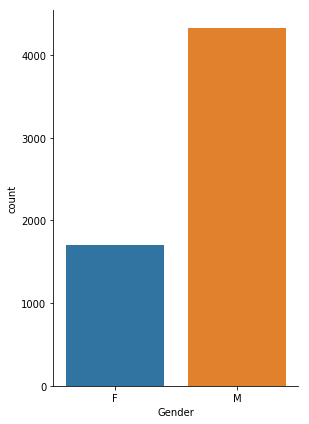

In [7]:
ax= sb.catplot(x="Gender",data=users_data, kind="count",height=6,aspect=.7)

## Visualization of Occupation in Ages by Genders

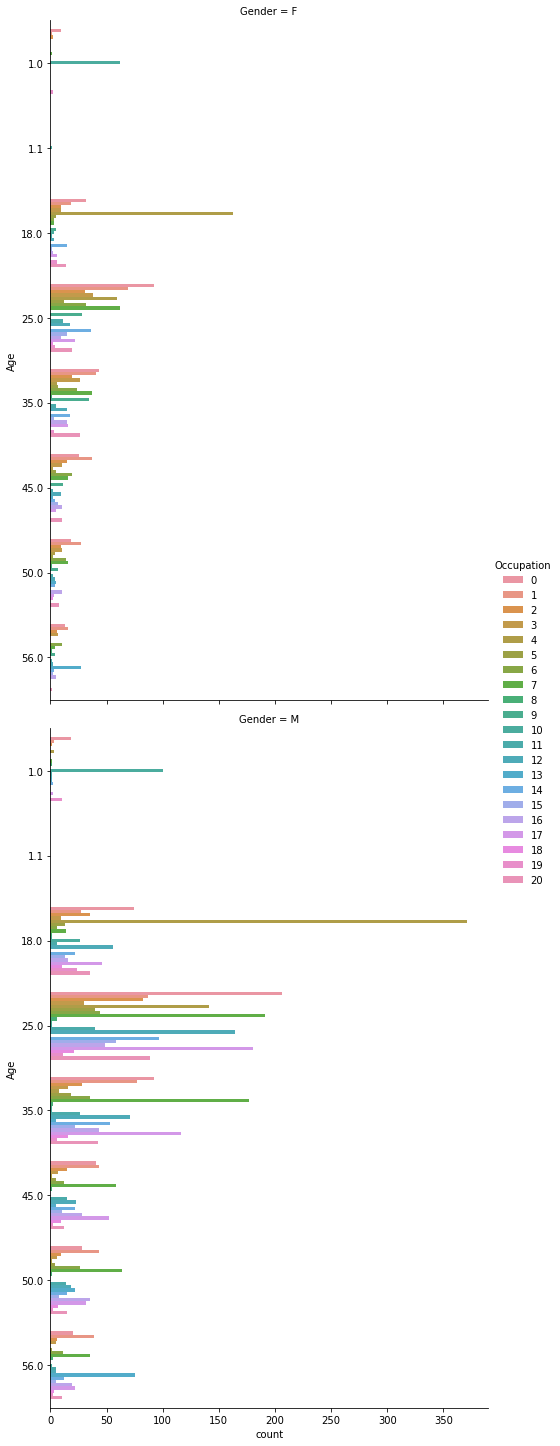

In [8]:
g = sb.catplot(y="Age", hue="Occupation", col="Gender",data=users_data, kind="count",height=10, aspect=.7,col_wrap=1)

## Visualization of Occupations

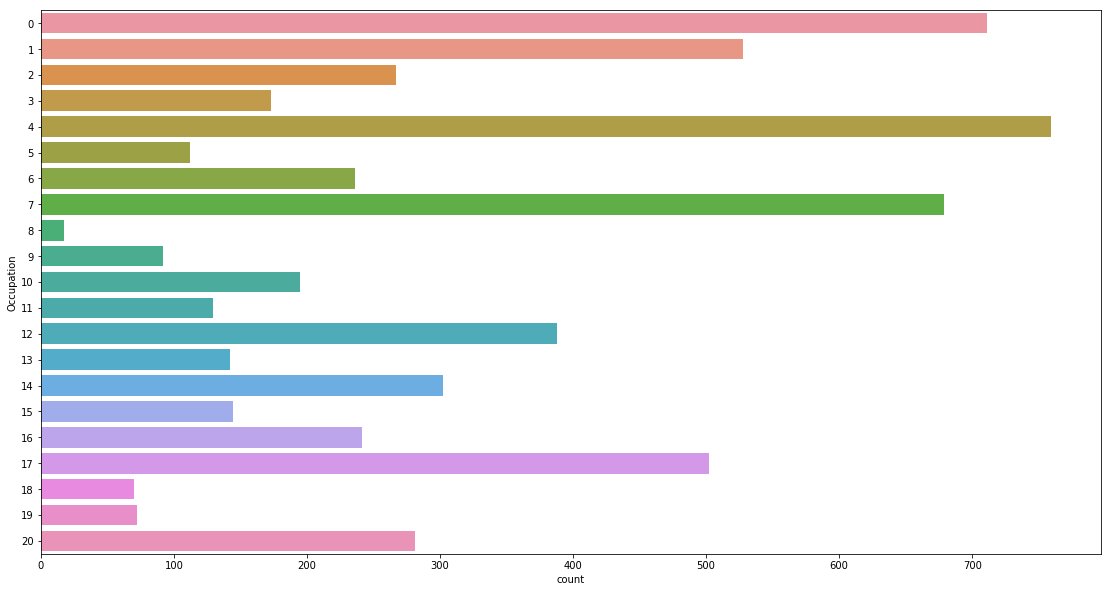

In [9]:
f,ax = mplot.pyplot.subplots(figsize=(19, 10)),sb.countplot(y="Occupation", data=users_data)

## Visualization on Ages in Genders

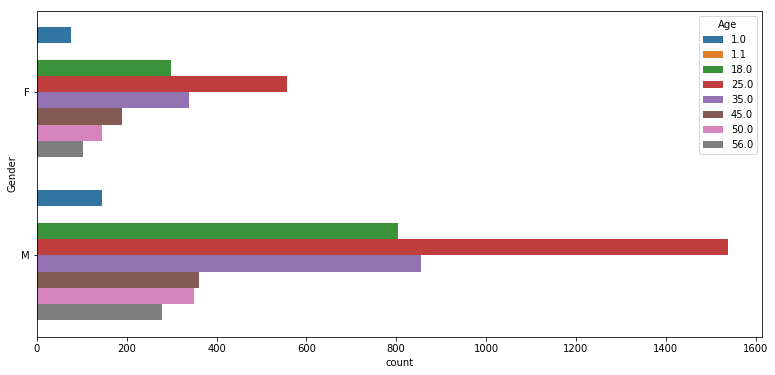

In [10]:
f,ax = mplot.pyplot.subplots(figsize=(13, 6)),sb.countplot(y="Gender", hue="Age", data=users_data)

# EDA for Movies.csv

In [11]:
movies_data=pd.read_csv("movies.csv")

In [12]:
movies_data.shape

(3883, 3)

In [13]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Genration of genres for better Visualization

In [14]:
moviesIdList=[]
titleList=[]
genresList=[]
for index, row in movies_data.iterrows():
    text=row['Genres'].split("|")
    for t in text:
        moviesIdList.append(row['MovieID'])
        titleList.append(row['Title'])
        genresList.append(t)
moviesIdList=np.array(moviesIdList)
titleList=np.array(titleList)
genresList=np.array(genresList)
movies_df=pd.DataFrame({"MoviesId":moviesIdList,"Title":titleList,"Genres":genresList})
movies_df.to_csv("Movies_genres.csv",index=False)

    

In [15]:
movies_df.head(20)

,MoviesId,Title,Genres
0,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Children's
2,1,Toy Story (1995),Comedy
3,2,Jumanji (1995),Adventure
4,2,Jumanji (1995),Children's
5,2,Jumanji (1995),Fantasy
6,3,Grumpier Old Men (1995),Comedy
7,3,Grumpier Old Men (1995),Romance
8,4,Waiting to Exhale (1995),Comedy
9,4,Waiting to Exhale (1995),Drama


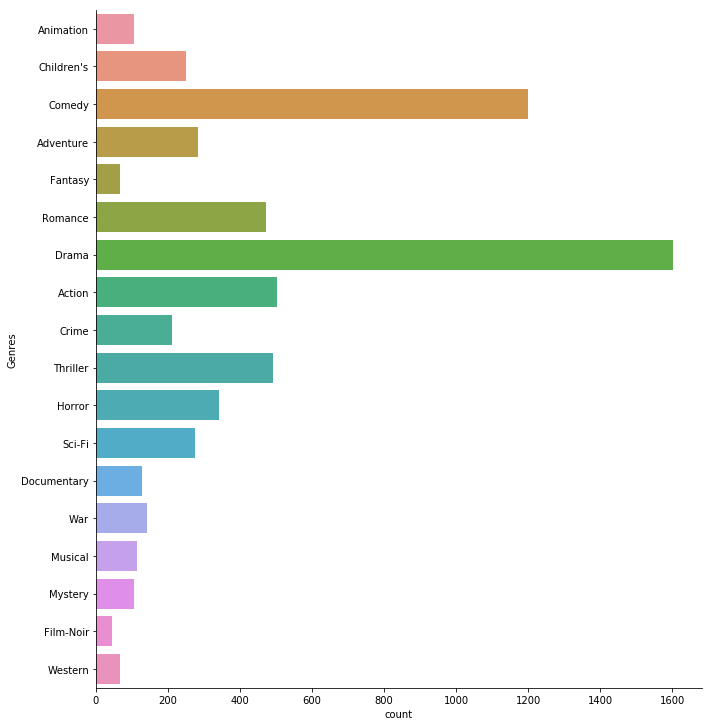

In [16]:
ax= sb.catplot(y="Genres",data=movies_df, kind="count",height=10)

# EDA for Ratings.csv

In [17]:
ratings_data=pd.read_csv("ratings.csv")

In [18]:
ratings_data.shape

(1000209, 4)

In [19]:
ratings_data.head(10)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [20]:
print("Number of ratings for all movies-",ratings_data.shape[0])

Number of ratings for all movies- 1000209


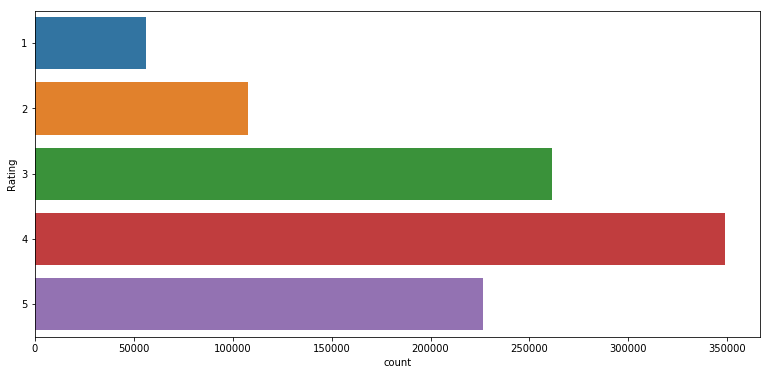

In [21]:
f,ax = mplot.pyplot.subplots(figsize=(13, 6)),sb.countplot(y="Rating",data=ratings_data)

# Word cloud

In [5]:
def word_counts(df,data):
    words = dict()
    lines = list()
    for line in data:
        new_line = str (line)
        lines.append(new_line)
    
    for l in lines:
        for word in l.split():
            word = word.strip()
            word = word.lower()
            if word in words:
                words[word] +=1
            else:
                words[word] = 1
    return words

In [3]:
movies_data=pd.read_csv("movies_data.csv")

In [6]:
word_count=word_counts(movies_data,movies_data['Title'])

In [7]:
df_word_count= pd.DataFrame(list(word_count.items()), columns = ['Word','Counts'])
df_word_count.head()

,Word,Counts
0,toy,6
1,story,53
2,jumanji,3
3,grumpier,2
4,old,14


In [22]:
sorted_words =df_word_count.sort_values('Counts', ascending=False)

      Word  Counts
11     the    2073
10      of     579
63       a     263
18     and     250
126     in     245
7       to     136
75     man     112
403     on      91
371   love      88
14      ii      86
686      i      75
93     for      69
154   from      66
533     my      65
215     la      62
101  night      57
87     iii      56
26    dead      55
273   star      55
1    story      53


AttributeError: module 'matplotlib.pyplot' has no attribute 'ishow'

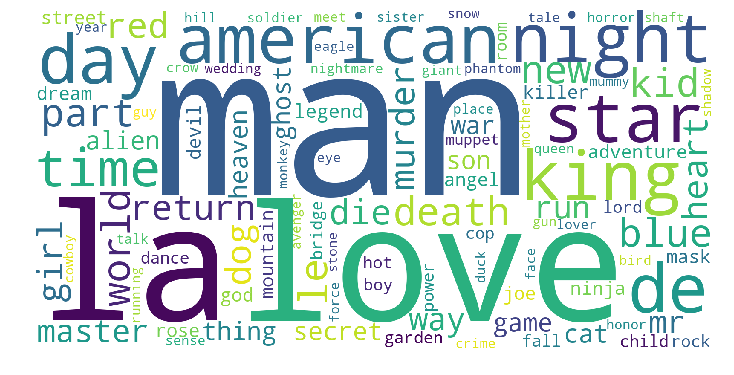

In [38]:

word_Cloud = WordCloud(width=1600, height=800,max_words=100,background_color="White").generate(" ".join(sorted_words['Word']))

mplot.pyplot.figure(figsize =(10,8))
mplot.pyplot.imshow(word_Cloud)
mplot.pyplot.axis('off')
mplot.pyplot.tight_layout(pad=0)
mplot.pyplot.show()